In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

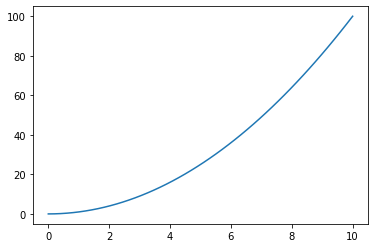

In [4]:
x = np.linspace(0,10)

y=x*x

plt.plot(x,y)
plt.show()

Hard to recognize this pattern in a scatterplot so rather than y=x*x take the derivative and look at y = 2x

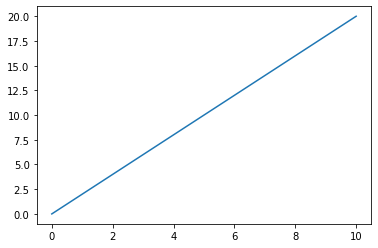

In [5]:
y= 2*x
plt.plot(x,y)
plt.show()

If i have a multiplicative series when i do the graph of the differences against the values itself (not time) expect something like this.

If have an additiive series and take the derivative = plotting the graph of differences against the values again get the following



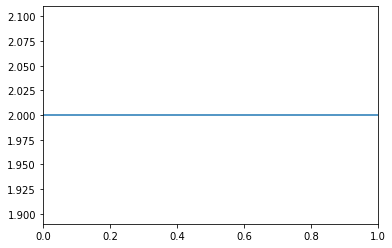

In [6]:
plt.axhline(y=2)
plt.show()

## UK Jobs vacancies example

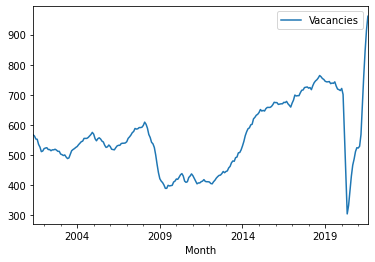

In [16]:
jobs_frame = pd.read_csv('./data/UK_job_vacancies.csv')
jobs_frame.index = pd.to_datetime(jobs_frame['Month'])
del jobs_frame['Month']
jobs_frame.plot()
plt.show()

### Plot differences of job vacancies against job vacancies

If see a trend then multiplicative
If flat then additive


<AxesSubplot:xlabel='Vacancies', ylabel='diff'>

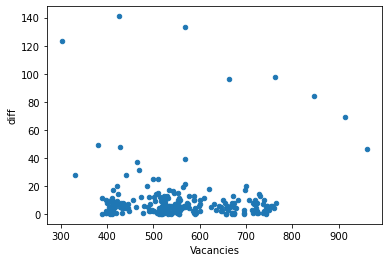

In [17]:
jobs_frame['diff'] = np.abs(jobs_frame['Vacancies'] - jobs_frame['Vacancies'].shift())
jobs_frame.plot.scatter(x='Vacancies', y='diff')

Find that this is very flat so this suggests that the job data is additive and not multiplicative

<AxesSubplot:>

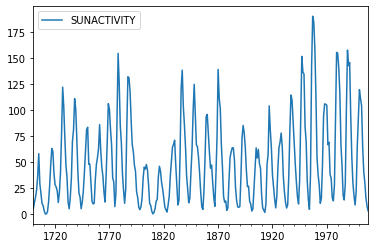

In [9]:
import statsmodels.api as sm

sun_frame = sm.datasets.sunspots.load_pandas().data
sun_frame.index = pd.Index(sm.tsa.datetools.dates_from_range("1700","2008"))
del sun_frame["YEAR"]
sun_frame.plot()

Multiplicative seasonality => seasonality seems to rise with the time

Going to take the differences and plot them against the sun activity
x = sun activity
y = differences in activitiy (derivative)

In [10]:
sun_frame['diff'] = np.abs(sun_frame['SUNACTIVITY'] - sun_frame['SUNACTIVITY'].shift())

<AxesSubplot:xlabel='SUNACTIVITY', ylabel='diff'>

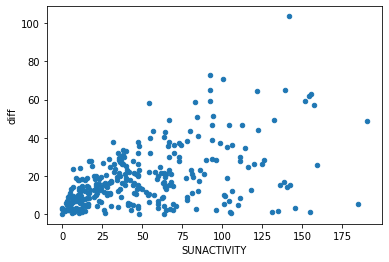

In [11]:
sun_frame.plot.scatter(x='SUNACTIVITY',y='diff')

Does look multiplicative  
So we take the log - 
 - take the log of something we go from something multiplied to something that's added

In [12]:
sun_frame['Log Activity'] = np.log(sun_frame['SUNACTIVITY'])

c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
sun_frame.head()

,SUNACTIVITY,diff,Log Activity
1700-12-31,5.0,NaN,1.609438
1701-12-31,11.0,6.0,2.397895
1702-12-31,16.0,5.0,2.772589
1703-12-31,23.0,7.0,3.135494
1704-12-31,36.0,13.0,3.583519


- take the differences of the logs now instead of the differences of the regular sun activity  
- plot the log difference against the log activity

<AxesSubplot:xlabel='Log Activity', ylabel='Log diff'>

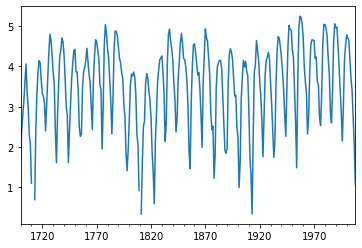

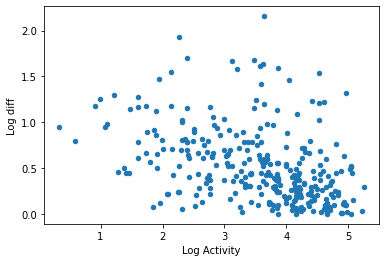

In [14]:


sun_frame['Log diff'] = np.abs(sun_frame['Log Activity'] - sun_frame['Log Activity'].shift())
sun_frame['Log Activity'].plot()
sun_frame.plot.scatter(x='Log Activity', y='Log diff')

Plot of the log activity - don't see the seasonality change anymore, seems to be more static rather than the seasonality increasing

Looking at scatter plot - looks flatter  

Have taken the log to take something multiplicative and turn it into something additive  
This is easier to deal with then multiplicative  


In the future will take the log of the time series, then make predictions, then take exponent of predictions to convert back to normal time series data. 